<a href="https://colab.research.google.com/github/gimenopea/EMSE6574/blob/master/PGimeno_Assign_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARIMA forecastin with stock VTSAX index fund

In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt


resource = 'https://query1.finance.yahoo.com/v7/finance/download/VTSAX?period1=1446854400&period2=1604707200&interval=1mo&events=history&includeAdjustedClose=true'

df = pd.read_csv(resource,index_col='Date',parse_dates=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-01,52.660000,52.660000,49.830002,50.790001,46.184391,0
2016-01-01,50.009998,50.099998,45.959999,47.919998,43.817982,0
2016-02-01,47.900002,48.259998,45.049999,47.900002,43.799698,0
2016-03-01,49.020000,51.080002,49.020000,51.029999,46.661758,0
2016-04-01,51.330002,52.169998,50.570000,51.360001,47.183231,0


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

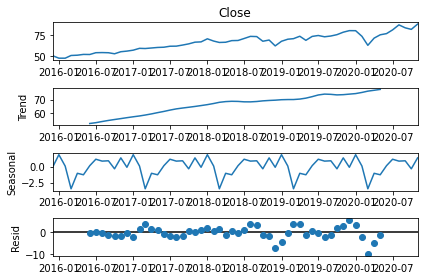

In [ ]:
res = seasonal_decompose(df['Close'])
res.plot();

In [ ]:
aa = auto_arima(df['Close'],seasonal=False,start_p=1, start_q=1)

In [ ]:
aa ## no seasonal order

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [ ]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [ ]:
model = SARIMAX(train['Close'],order=(1,1,0),seasonal_order=(1,1,0,12))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
results = model.fit()

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

In [ ]:
predictions = results.predict(start,end).rename('SARIMA Predictions')

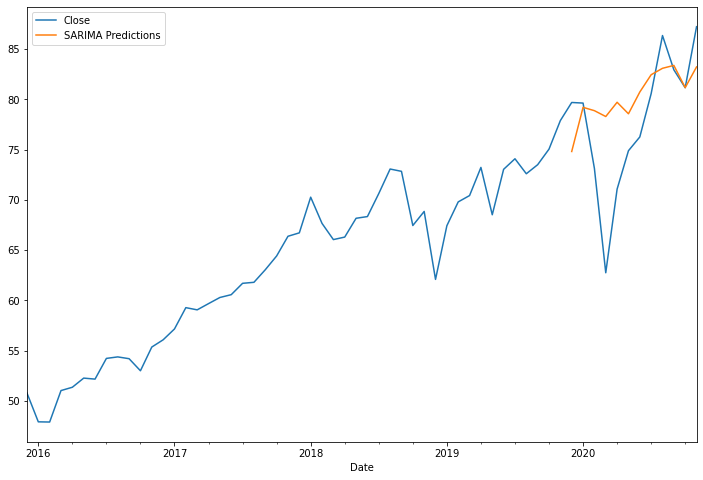

In [ ]:
df['Close'].plot(legend=True,figsize=(12,8))
#test['Close'].plot(legend=True,label='test')

predictions.plot(legend=True)

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.83321339, 0.84894454, 0.86142154, 0.87664849, 0.89211485,
        0.90800787, 0.92533706, 0.94473857, 0.9624707 , 0.97993918,
        1.        , 0.97993918, 0.9624707 , 0.94473857, 0.92533706,
        0.90800787, 0.89211485, 0.87664849, 0.86142154, 0.84894454,
        0.83321339]),
 <matplotlib.lines.Line2D at 0x7f5d5b670e10>)

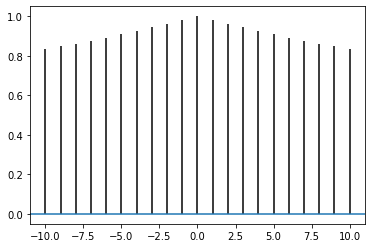

In [ ]:
plt.acorr(df['Close'])